**Proyek: Analisis Data Karyawan Fiktif 🧑‍💻 (penerapan data Cleaning and imputation)**


**Skenario:**

**diberikan dataset fiktif employee_data.csv. Dataset ini kacau: ada data yang hilang, tipe data yang salah, dan beberapa outlier. Tugas Anda adalah membersihkan dan menganalisis dataset ini untuk memberikan wawasan kepada departemen SDM.**

---

**Tugas:**

**1.Muat dan Inspeksi Data:**
- Muat data ke dalam DataFrame pandas.
- Gunakan .info() dan .isna().sum() untuk mengidentifikasi masalah awal (nilai hilang, tipe data yang salah).

In [260]:
import pandas as pd

df_employ = pd.read_csv('employee_data.csv')
print(df_employ.head())

print(df_employ.info())
print(df_employ.isna().sum())

   Employee_ID   Department  Years_At_Company  Satisfaction_Score  \
0          101        Sales               5.0                 4.5   
1          102  Engineering               3.0                 3.8   
2          103    Marketing               7.0                 NaN   
3          104        Sales              15.0                 2.1   
4          105  Engineering               NaN                 4.2   

  Last_Salary_USD  
0          85,000  
1          92,000  
2             NaN  
3         150,000  
4          98,000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         10 non-null     int64  
 1   Department          10 non-null     object 
 2   Years_At_Company    9 non-null      float64
 3   Satisfaction_Score  8 non-null      float64
 4   Last_Salary_USD     8 non-null      object 
dtypes: float64(2), i

---

**2.Pembersihan Data:**

- Tangani Data Hilang:

    - Untuk Years_At_Company, imputasi nilai yang hilang dengan median dari kolom tersebut.
    - Untuk Satisfaction_Score, imputasi nilai yang hilang dengan rata-rata (mean) dari kolom tersebut.
    - Untuk Last_Salary_USD, karena ini adalah data penting, hapus baris di mana gaji hilang.

- Perbaiki Tipe Data:

    - Kolom Last_Salary_USD saat ini bertipe object karena ada koma. Hapus koma dan konversikan kolom ini menjadi tipe data numerik (misalnya, float atau int).

In [261]:
#handling missing values

df_employ['Years_At_Company'] = df_employ['Years_At_Company'].fillna(df_employ['Years_At_Company'].median())
df_employ['Satisfaction_Score'] = df_employ['Satisfaction_Score'].fillna(df_employ['Satisfaction_Score'].mean()).round(2)

# df_employ.dropna(subset=["Last_Salary_USD"])           # buang NaN
# df_employ[df_employ["Last_Salary_USD"].str.strip() != ""]  # buang string kosong
df_clean = df_employ[df_employ["Last_Salary_USD"].notna() & (df_employ["Last_Salary_USD"].str.strip() != "")].copy()

In [262]:
#fix Dtype to float
df_clean['Last_Salary_USD'] = df_clean['Last_Salary_USD'].str.replace(",", "")
df_clean['Last_Salary_USD'] = df_clean['Last_Salary_USD'].astype(float)

In [263]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employee_ID         8 non-null      int64  
 1   Department          8 non-null      object 
 2   Years_At_Company    8 non-null      float64
 3   Satisfaction_Score  8 non-null      float64
 4   Last_Salary_USD     8 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 384.0+ bytes
None


In [264]:
df_clean['Last_Salary_USD'].unique()

array([ 85000.,  92000., 150000.,  98000.,  82000.,  75000., 250000.,
        95000.])

In [265]:
df_clean

,Employee_ID,Department,Years_At_Company,Satisfaction_Score,Last_Salary_USD
0,101,Sales,5.0,4.50,85000.0
1,102,Engineering,3.0,3.80,92000.0
3,104,Sales,15.0,2.10,150000.0
4,105,Engineering,6.0,4.20,98000.0
5,106,Sales,4.0,4.80,82000.0
6,107,HR,9.0,3.50,75000.0
7,108,Engineering,25.0,4.90,250000.0
9,110,Engineering,4.0,3.96,95000.0


---
**3.Analisis dan Rekayasa Fitur:**

- Identifikasi Outlier: Gunakan metode Interquartile Range (IQR) pada kolom Last_Salary_USD untuk mengidentifikasi apakah ada gaji yang dianggap sebagai outlier. Cetak baris data yang merupakan outlier.

- Buat Kolom Baru: Buat kolom baru bernama Employee_Tenure berdasarkan Years_At_Company dengan kategori berikut:
    - "New" (0-3 tahun)
    - "Mid" (4-8 tahun)
    - "Senior" (>8 tahun)

In [266]:
# calculate IQR 
Q1 = df_clean['Last_Salary_USD'].quantile(0.25)
Q3 = df_clean['Last_Salary_USD'].quantile(0.75)

IQR =  Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

# identification outlier
outliers = df_clean[(df_clean['Last_Salary_USD'] < lower_bound) | (df_clean['Last_Salary_USD'] > upper_bound)]
outliers['Last_Salary_USD']


Q1: 84250.0
Q3: 111000.0
IQR: 26750.0
Lower Bound: 44125.0
Upper Bound: 151125.0


7    250000.0
Name: Last_Salary_USD, dtype: float64

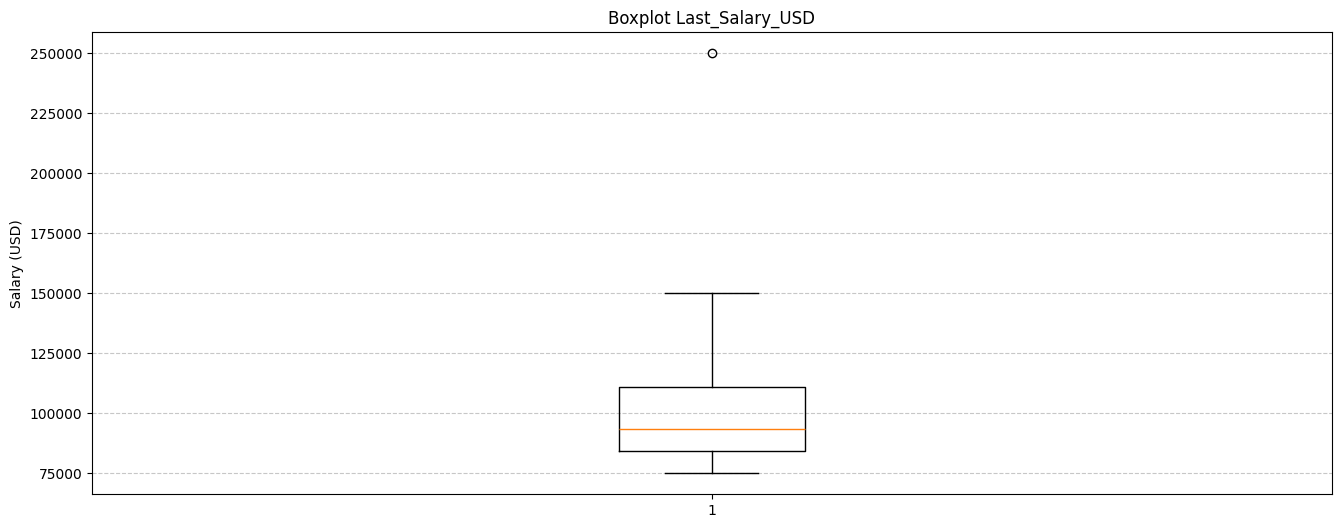

In [267]:
import matplotlib.pyplot as plt
# Boxplot
plt.figure(figsize=(16,6))
plt.boxplot(df_clean['Last_Salary_USD'], vert=True)
plt.title("Boxplot Last_Salary_USD")
plt.ylabel("Salary (USD)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In [268]:
#Adding new column
Employee_Tenure = []

for index, baris in df_clean.iterrows():
    if baris['Years_At_Company'] > 8:
        Employee_Tenure.append('Senior')
    elif baris['Years_At_Company'] >= 4:
        Employee_Tenure.append('Mid')
    else:
        Employee_Tenure.append('New')

df_clean['Employee_Tenure'] = Employee_Tenure
# df_penjualan.sort_values(ascending=False)
df_clean




,Employee_ID,Department,Years_At_Company,Satisfaction_Score,Last_Salary_USD,Employee_Tenure
0,101,Sales,5.0,4.50,85000.0,Mid
1,102,Engineering,3.0,3.80,92000.0,New
3,104,Sales,15.0,2.10,150000.0,Senior
4,105,Engineering,6.0,4.20,98000.0,Mid
5,106,Sales,4.0,4.80,82000.0,Mid
6,107,HR,9.0,3.50,75000.0,Senior
7,108,Engineering,25.0,4.90,250000.0,Senior
9,110,Engineering,4.0,3.96,95000.0,Mid


---
**4.Sajikan Wawasan:**
- Hitung gaji rata-rata untuk setiap Department. Departemen mana yang memiliki gaji rata-rata tertinggi?
- Hitung skor kepuasan rata-rata untuk setiap kategori Employee_Tenure. Apakah karyawan yang lebih lama cenderung lebih puas?

In [269]:
print(df_clean.columns)

Index(['Employee_ID', 'Department', 'Years_At_Company', 'Satisfaction_Score',
       'Last_Salary_USD', 'Employee_Tenure'],
      dtype='object')


In [273]:
# calculate mean/AVG of last_salary_USD based Departement
avg_salary_each_department = df_clean.groupby('Department')['Last_Salary_USD'].agg(['mean']).round(2)
print("Rata-rata Salary Setiap Departement adalah: $")
avg_salary_each_department.sort_values(by='mean', ascending=False)

Rata-rata Salary Setiap Departement adalah: $


,mean
Department,
Engineering,133750.00
Sales,105666.67
HR,75000.00


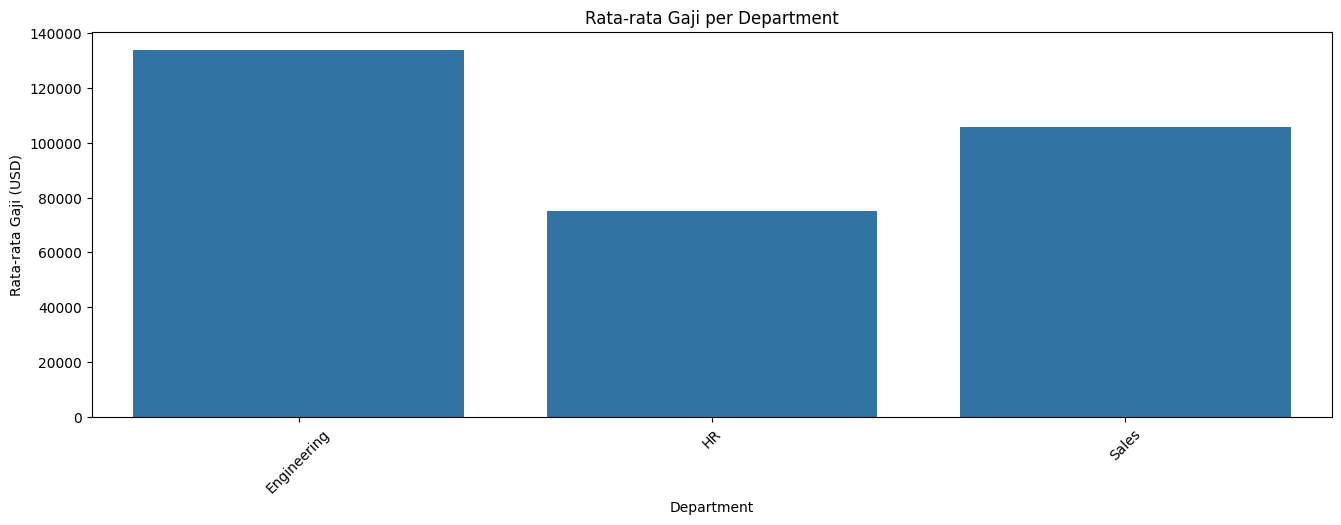

In [276]:
import seaborn as sns
plt.figure(figsize=(16,5))
sns.barplot(x=avg_salary_each_department.index, y=avg_salary_each_department["mean"])

plt.title("Rata-rata Gaji per Department")
plt.xlabel("Department")
plt.ylabel("Rata-rata Gaji (USD)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# calculate Satisfaction_Score
skor_kepuasan_avg = df_clean.groupby('Employee_Tenure')['Satisfaction_Score'].agg(['mean']).round(2)
skor_kepuasan_avg

,mean
Employee_Tenure,
Mid,4.36
New,3.80
Senior,3.50


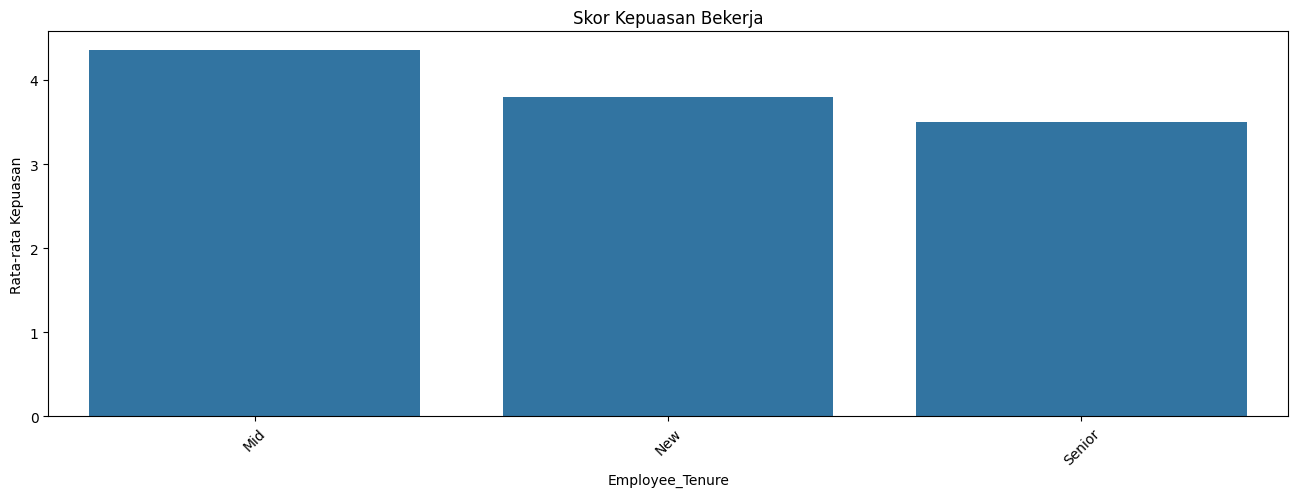

In [278]:
plt.figure(figsize=(16,5))
sns.barplot(x=skor_kepuasan_avg.index, y=skor_kepuasan_avg["mean"])

plt.title("Skor Kepuasan Bekerja")
plt.xlabel("Employee_Tenure")
plt.ylabel("Rata-rata Kepuasan")
plt.xticks(rotation=45)
plt.show()

---

**Kesimpulan**

-  Departemen dengan gaji rata-rata tertinggi adalah Engineering dengan rata-rata **$133,750**, diikuti oleh Sales ($105,666.67) dan HR ($75,000).
- Ternyata tidak. Karyawan dengan masa kerja Mid (4-8 tahun) menunjukkan skor kepuasan tertinggi (rata-rata 4.36). Menariknya, karyawan Senior (>8 tahun) memiliki skor kepuasan rata-rata terendah (3.50), bahkan lebih rendah dari karyawan New (0-3 tahun) yang memiliki skor 3.80 